In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
alphabets = pd.read_csv('alphabets_28x28.csv')

C:\Users\Varun Gopal\AppData\Local\Temp\ipykernel_5756\1190487464.py:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  alphabets = pd.read_csv('alphabets_28x28.csv')


In [4]:
some = alphabets[0:300000]

In [5]:
alphabets = alphabets.dropna()

In [6]:
alphabets.shape

(371391, 785)

In [7]:
train_y=[]
for i in list(alphabets['label']):
    train_y.append(ord(i)-ord('A'))

In [8]:
train_x = alphabets.drop(alphabets.columns[0], axis=1, inplace=False)

In [9]:
train_x = np.array(train_x,dtype=float)

In [10]:
train_x.shape
train_x = train_x.reshape(train_x.shape[0],28,28)

In [11]:
train_x.shape

(371391, 28, 28)

array([0., 0., 0., ..., 0., 0., 0.])

In [129]:
len(one_hot)

371391

In [128]:
one_hot = np.array(one_hot)

In [101]:
model = keras.Sequential([
    keras.layers.Conv2D(32,3,input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16,3,activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(27,activation='softmax')
])

model.compile(
    metrics=['accuracy'],
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)


train_y=np.array(train_y)

In [137]:
model.fit(train_x,train_y,epochs=1)

11606/11606 ━━━━━━━━━━━━━━━━━━━━ 144s 12ms/step - accuracy: 0.9678 - loss: 0.1142


In [104]:
img1 = cv.imread('line_1.png')
img2 = cv.imread('line_2.png')
img3 = cv.imread('line_3.png')
img4 = cv.imread('line_4.png')
img5 = cv.imread('line_5.png')
img6 = cv.imread('line_6.png')

In [115]:
m=12
n=10

def splitimg(img,m,n):
   block_height = img.shape[0] // m
   block_width = img.shape[1] // n
   rectangles = []
   for i in range(m):
        for j in range(n):
            # Define the coordinates of the current block
            start_y = i * block_height
            end_y = start_y + block_height
            start_x = j * block_width
            end_x = start_x + block_width
            
            # Extract the rectangle from the image
            rectangle = img[start_y:end_y, start_x:end_x, :]
            rectangle = cv.resize(rectangle,(28,28))
            rectangle = cv.cvtColor(rectangle, cv.COLOR_BGR2GRAY)
            rectangles.append(rectangle)
   return np.array(rectangles)



In [154]:
split1=splitimg(img1,12,10)
split2=splitimg(img2,13,10)
split3=splitimg(img3,12,10)
split4=splitimg(img4,12,10)
split5=splitimg(img5,12,10)
split6=splitimg(img6,13,10)

In [ ]:
# training for blank characters
tr= []
tr.append(split1[1])
tr = np.array(tr)
tr_l = np.array([26])
for i in range(100):
    model.fit(tr, tr_l)

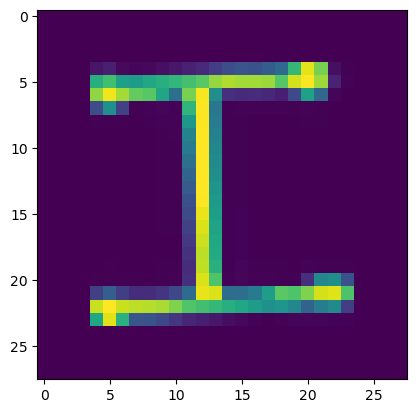

In [150]:
imgff.shape
plt.imshow(imgff)

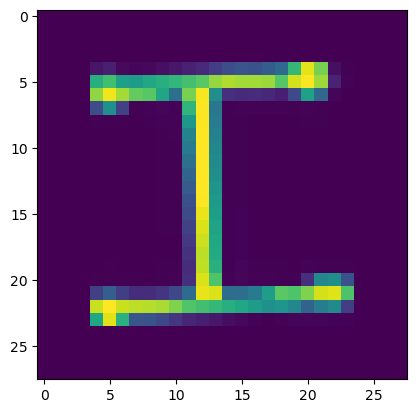

In [151]:
plt.imshow(split1[0])

In [152]:
sentences=[]
def pred(images):
    word=''
    pre = model.predict(images)
    for i in pre:
        if(np.argmax(i)+65<=90):
            word+= chr(np.argmax(i)+65)
        else:
            word+=' '
    return word
   

In [153]:
print(pred(split1))
print(pred(split2))
print(pred(split3))
print(pred(split4))
print(pred(split5))
print(pred(split6))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFFSR ANY GOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATIVE 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
IT IS FRUSTRATING THAT YOU NEVER PAY ATTENTION DURING DISCUSSIONS ANO YOUR LACK OF FOCUS IS REDLLY AFFECTING OUR PROGRESS         
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
I AM DELIGHTED BY YOUR FRIENDLINESB AND YOU ALWAYS MAKE EVERYONE FEEL WELCOMG WHICH FOSTERS A SENSE OF COMMUNITY        
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
IT IS WONDERFUL THAT YOU ALWAYS SHOW KINDNESS AND YOUR EMPATHY TOWARDS OTHERS IS TRULY HEARTWARMINJ AND APPRECIATED     
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
YOUR ANALYSIS OF THE DMTA WAS ACCURATE AND MELL PRESENTED PROVIDING A CLOAR UNDERSTANBING OF THE TRENDS AND PATTERNS    
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
THE MEETING MINUTES YOU PREPARED WERE DETAILED AND WELL ORGANIZED ACCURATELS REFLECTING THE DISCUSSIONS AND DECISIONS MADE        


In [96]:
split1.shape

(120, 28, 28, 3)

In [130]:
tr.shape

(1, 28, 28)